<h1>Lending Club Case Study</h1>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h2>1. Data Cleaning and Manipulation</h2>

In [105]:
# Read the Excel file into a DataFrame
raw_data = pd.read_csv("loan.csv")
raw_data.shape

(39717, 111)

<b>Drop Columns that has all null</b>

In [106]:
columns = raw_data.isna().sum()
nullcolumns = columns[columns == 39717].index.tolist()
#print("List of Null Columns ", nullcolumns)
print("Number of Null columns dropped", len(nullcolumns))
raw_data = raw_data.drop(nullcolumns, axis=1)
raw_data.shape

Number of Null columns dropped 54


(39717, 57)

<b>Drop Columns that has same value across all rows</b>

In [107]:
dupcolumns = [column for column in raw_data.columns if raw_data[column].nunique()==1]
#print("List of Duplicate Columns ", dupcolumns)
print("Number of duplicate columns dropped", len(dupcolumns))
raw_data = raw_data.drop(dupcolumns, axis=1)
raw_data.shape

Number of duplicate columns dropped 9


(39717, 48)

<b>Remove other columns which is not relevant for the analysis</b>

In [108]:
raw_data = raw_data.drop(["id", "member_id","funded_amnt", "funded_amnt_inv", "emp_title", "url", "desc", "title", "next_pymnt_d", "last_pymnt_d"], axis=1)
raw_data.shape

(39717, 38)

<b>Impute Values</b>

In [109]:
# Fill all 'NA' values
raw_data['mths_since_last_delinq'] = raw_data['mths_since_last_delinq'].fillna(0)
raw_data['emp_length'] = raw_data['emp_length'].fillna(0)
raw_data['pub_rec_bankruptcies'] = raw_data['pub_rec_bankruptcies'].fillna(0)
raw_data['mths_since_last_record'] = raw_data['mths_since_last_record'].fillna(0)
raw_data['revol_util'] = raw_data['revol_util'].fillna(0)

# Replace values in few columns and change type from object to int/float64
raw_data['term'] = raw_data['term'].str.replace(' months', '')
raw_data['term'] = raw_data['term'].astype('int64')
raw_data['int_rate'] = raw_data['int_rate'].str.replace('%', '')
raw_data['int_rate'] = raw_data['int_rate'].astype('float64')
raw_data['revol_util'] = raw_data['revol_util'].str.replace('%', '')
raw_data['revol_util'] = raw_data['revol_util'].astype('float64')
raw_data['emp_length'] = raw_data['emp_length'].str.replace('10\+ years', '10')
raw_data['emp_length'] = raw_data['emp_length'].str.replace(' years', '')
raw_data['emp_length'] = raw_data['emp_length'].str.replace(' year', '')
raw_data['emp_length'] = raw_data['emp_length'].str.replace('< 1', '0.5')
raw_data['emp_length'] = raw_data['emp_length'].astype('float64')
raw_data['emp_length'] = raw_data['emp_length'].fillna(0)
raw_data = raw_data.rename(columns={'term': 'term_in_months', 'revol_util': 'revol_util_in_percent', 'emp_length':'years_of_exp'})
raw_data.isna().sum()

loan_amnt                   0
term_in_months              0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
years_of_exp                0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
mths_since_last_delinq      0
mths_since_last_record      0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util_in_percent      50
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries

In [112]:
lc_analysis_data = raw_data[raw_data.loan_status != "Current"]
lc_analysis_data.shape

(38577, 38)

<b>Removing Outliers</b>

<Axes: >

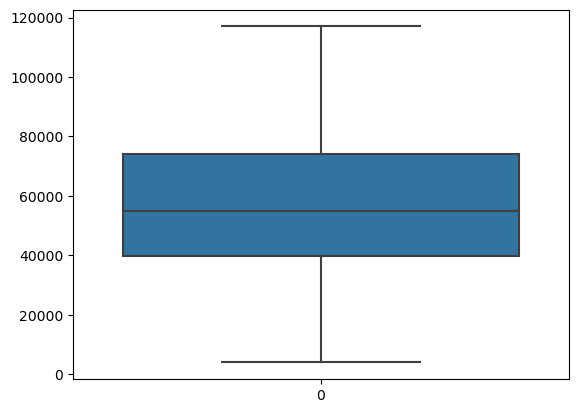

In [119]:
lc_analysis_data = lc_analysis_data[lc_analysis_data.annual_inc <= lc_analysis_data['annual_inc'].quantile(0.95)]
sns.boxplot(lc_analysis_data.annual_inc)

<Axes: >

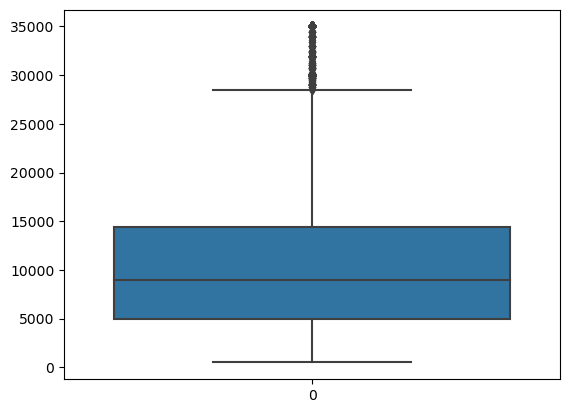

In [121]:
sns.boxplot(lc_analysis_data.loan_amnt)

<h2>2. Data analysis</h2>